# Customer Churn Prediction
ravirajchaurasiya111@gmail.com

Import libraries

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, StandardScaler
import sklearn.feature_selection
from sklearn.model_selection import train_test_split
from collections import defaultdict
from sklearn import metrics
import pixiedust

Pixiedust database opened successfully


In [3]:
customer_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

Checking whether data is properly loaded or not

In [13]:
pd.set_option('display.max_columns', 30)
customer_data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# Getting more info about the dataset - checking missing values.

In [14]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

Clearly, there is no missing or null value found. So, we are good to go!

In [15]:
# since customerID column values are of no use in predicting churn, we will drop it
customer_data = customer_data.drop('customerID', axis=1)
customer_data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
# TotalCharges 7043 non-null object
new_col = pd.to_numeric(customer_data.iloc[:, 18], errors='coerce')
new_col

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
5        820.50
6       1949.40
7        301.90
8       3046.05
9       3487.95
10       587.45
11       326.80
12      5681.10
13      5036.30
14      2686.05
15      7895.15
16      1022.95
17      7382.25
18       528.35
19      1862.90
20        39.65
21       202.25
22        20.15
23      3505.10
24      2970.30
25      1530.60
26      4749.15
27        30.20
28      6369.45
29      1093.10
         ...   
7013    3756.40
7014    3645.75
7015    2874.45
7016      49.95
7017    1020.75
7018      70.65
7019     826.00
7020     239.00
7021     727.80
7022    7544.30
7023    6479.40
7024    3626.35
7025    1679.40
7026     403.35
7027     931.55
7028    4326.25
7029     263.05
7030      39.25
7031    3316.10
7032      75.75
7033    2625.25
7034    6886.25
7035    1495.10
7036     743.30
7037    1419.40
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Leng

In [17]:
# adding the converted column to our dataframe.
customer_data.iloc[:, 18] = pd.Series(new_col)
customer_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [18]:
# Check if we have any NaN values
customer_data.isnull().values.any()

True

#### Previously we had no missing values but after converting TotalCharges column from object to float64, missing values appeared.

### Handling Missing Values
Replacing missing values with mean of the non-null values.


In [21]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values="NaN", strategy="mean")
customer_data.iloc[:, 18] = imp.fit_transform(customer_data.iloc[:, 18].values.reshape(-1, 1))
customer_data.iloc[:, 18] = pd.Series(customer_data.iloc[:, 18])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [22]:
# Check if we have any NaN values
customer_data.isnull().values.any()

False

In [23]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


#### Everything looks fine now. Good to go!

### Performing Exploratory Data Analysis (EDA)

In [24]:
# Describe columns with numerical values
pd.set_option('precision', 3)
customer_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000,7043.000,7043.000,7043.000
mean,0.162,32.371,64.762,2283.300
std,0.369,24.559,30.090,2265.000
min,0.000,0.000,18.250,18.800
25%,0.000,9.000,35.500,402.225
50%,0.000,29.000,70.350,1400.550
75%,0.000,55.000,89.850,3786.600
max,1.000,72.000,118.750,8684.800


In [25]:
# Describe columns with objects
customer_data.describe(exclude=np.number)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


### Finding correlation

In [26]:
# correlation matrix
customer_data.corr(method='pearson')

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000,0.017,0.220,0.102
tenure,0.017,1.000,0.248,0.825
MonthlyCharges,0.220,0.248,1.000,0.650
TotalCharges,0.102,0.825,0.650,1.000


## Visualizing Data

In [29]:
# Using Pixiedust for visualization
display(customer_data)

gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Male,1,No,No,71,No,No phone service,DSL,Yes,Yes,No,No,Yes,Yes,One year,Yes,Electronic check,56.45,3985.35,No
Female,0,No,No,1,Yes,No,DSL,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,54.65,54.65,No
Female,0,No,No,62,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.2,1123.65,No
Male,0,No,No,5,Yes,No,DSL,Yes,No,No,Yes,No,No,Month-to-month,Yes,Mailed check,55.75,266.95,No
Female,0,Yes,No,64,Yes,No,DSL,No,Yes,Yes,Yes,No,Yes,Two year,Yes,Mailed check,68.3,4378.8,No
Female,0,Yes,No,27,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),90.15,2423.4,No
Female,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,42.45,No
Male,0,No,No,6,Yes,No,DSL,No,No,Yes,No,Yes,No,Month-to-month,No,Mailed check,60.9,414.1,No
Female,0,Yes,Yes,65,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),82.5,5215.1,No
Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,2283.3004408418656,No


### Plotting Tenure vs Churn count

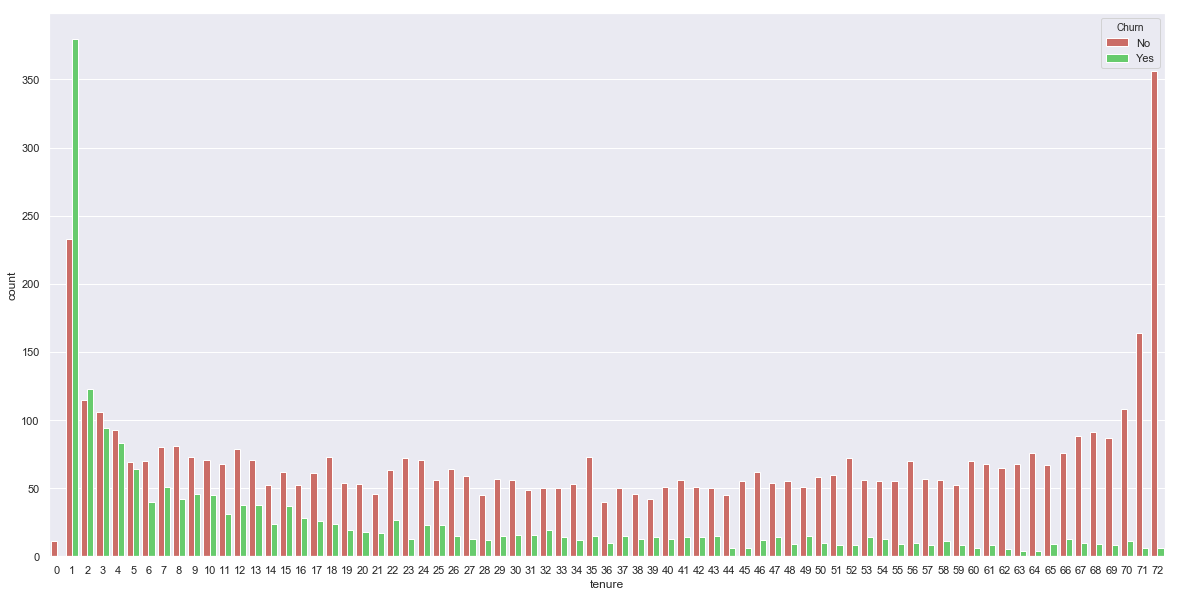

In [30]:
# Plot Tenure Frequency count
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(x="tenure", hue="Churn", data=customer_data)

Clearly, it can be seen that the highest rate of churn is from the ones with tenure=1 whereas the ones with tenure =72 have
the highest non-churn rate. This implies that with increased tenure; trust builds and customer sticks to the
company/product.

### Plotting Contract vs Churn count.

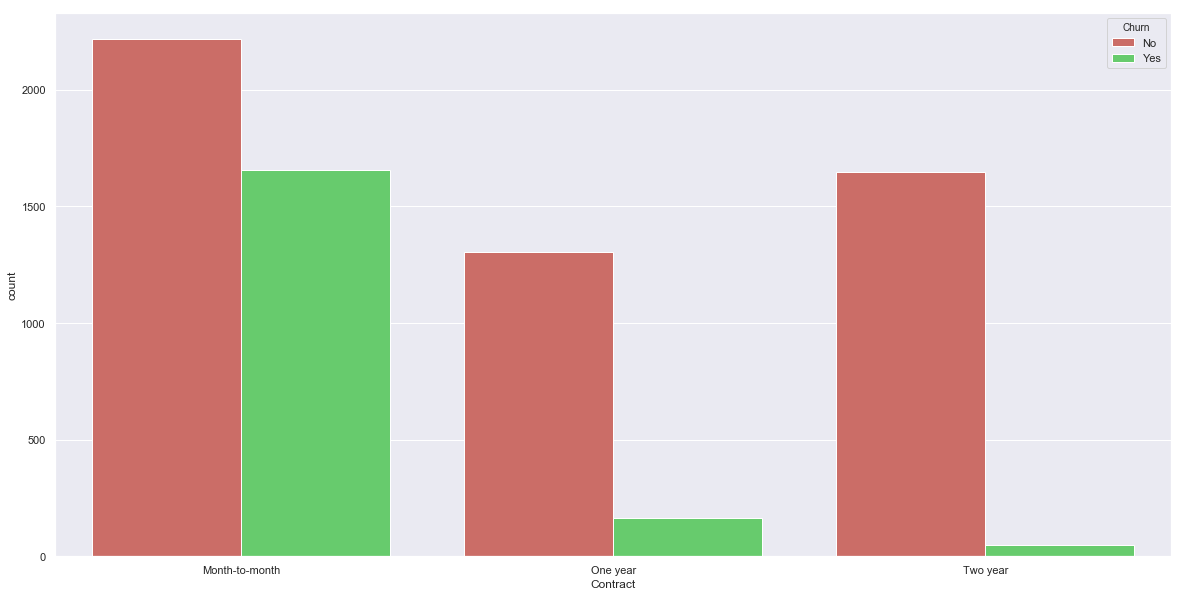

In [31]:
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(x="Contract", hue="Churn", data=customer_data)

Clearly, customers with longer contract have a low churn rate than the ones with month-to-month basis. With month-tomonth option they have the freedom to switch to a different operator or product because they are free from financial
commitment. This is the reason why many companies makes great and cheap offers for longer contracts. Like 149 for 1
month but 379 for three months.

### Plotting TechSupport vs Churn count.

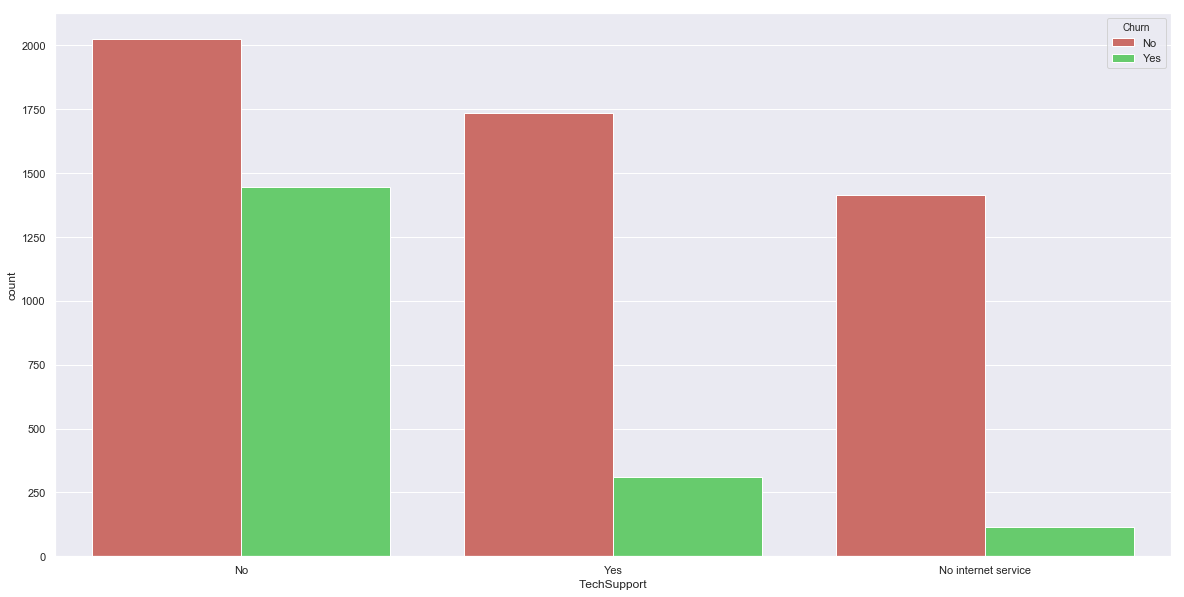

In [72]:
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(x="TechSupport", hue="Churn", data=customer_data)

### Plotting pairwise relationships.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


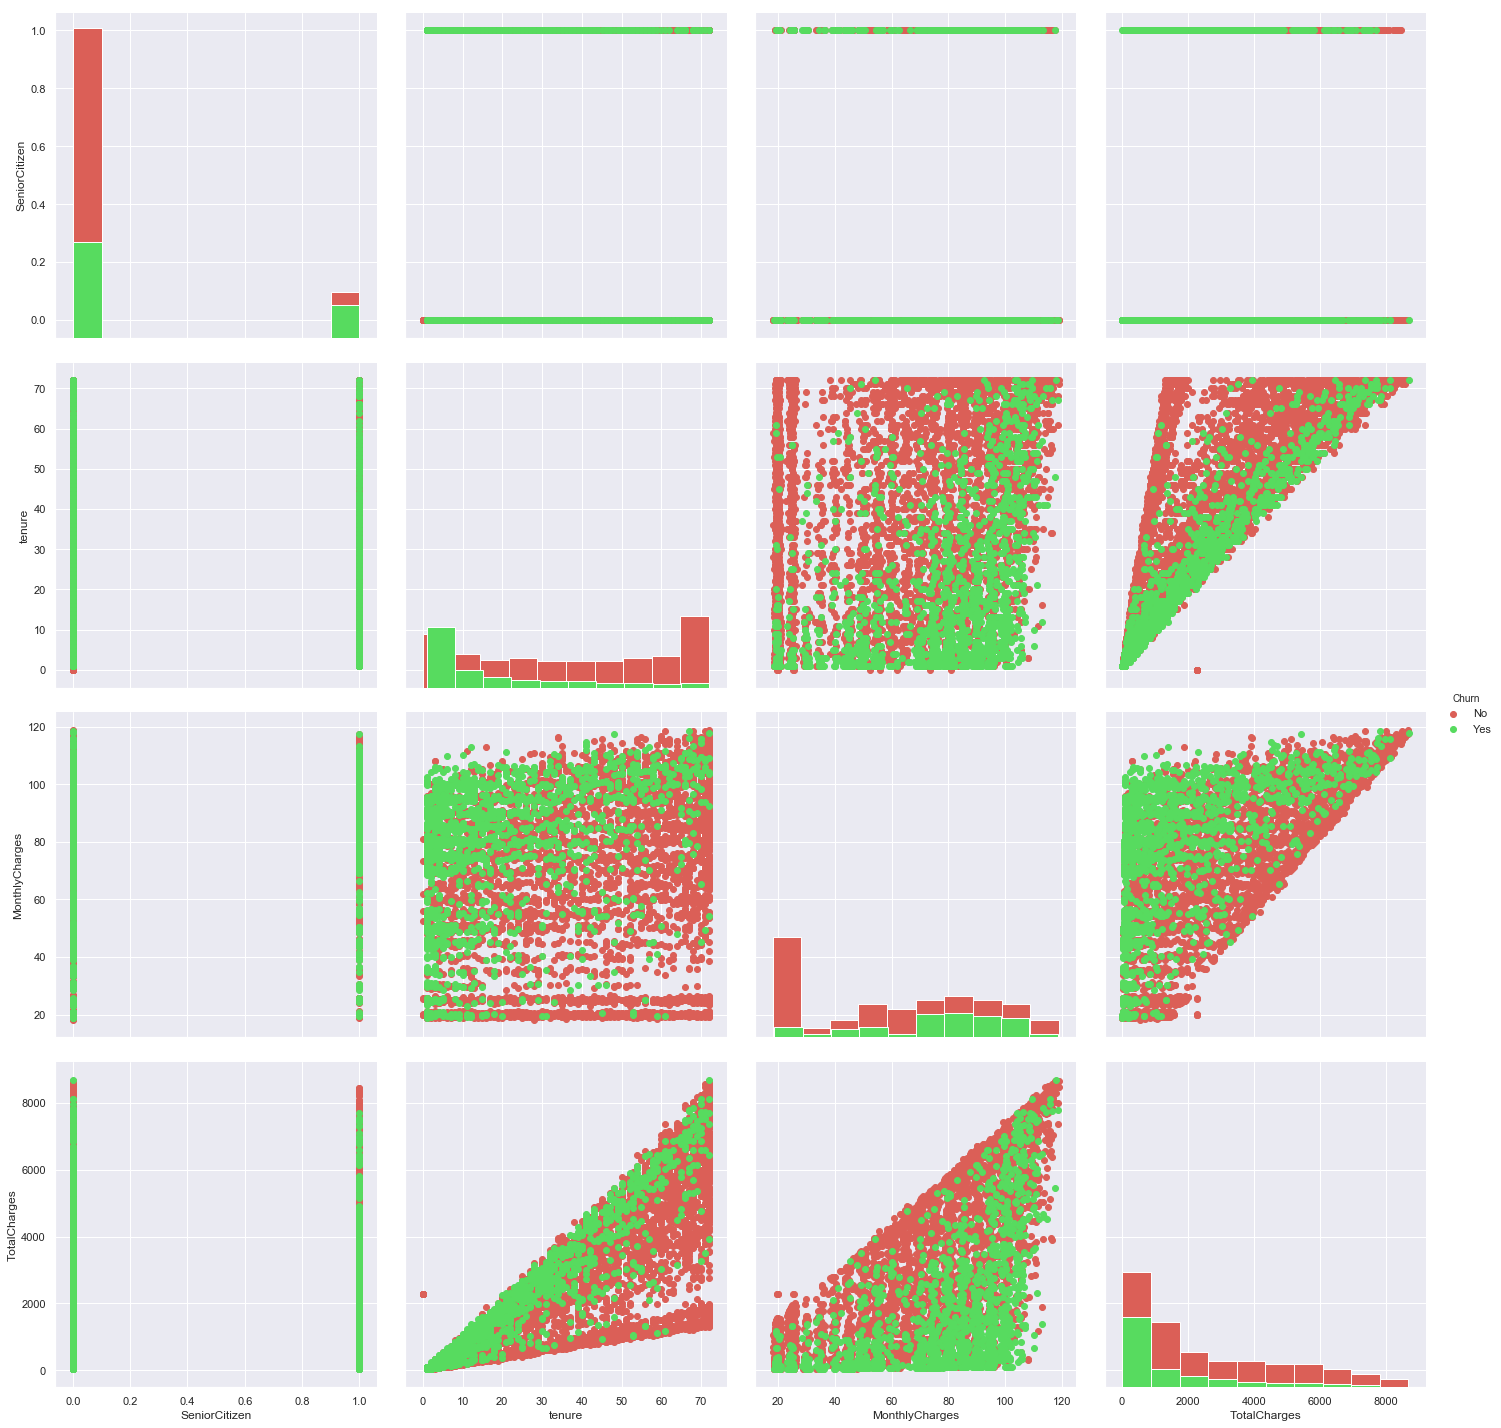

In [73]:
gr = sns.PairGrid(customer_data, size=5, hue="Churn")
gr = gr.map_diag(plt.hist)
gr = gr.map_offdiag(plt.scatter)
gr = gr.add_legend()

### Encode string values in data into numerical values

In [34]:
# Use pandas get_dummies
customer_data_encoded = pd.get_dummies(customer_data)
customer_data_encoded.head(10)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.85,29.85,1,0,0,1,1,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,0,1,1,0,0,...,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,0,1,1,0,0,...,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
4,0,2,70.70,151.65,1,0,1,0,1,0,0,1,1,0,0,...,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
5,0,8,99.65,820.50,1,0,1,0,1,0,0,1,0,0,1,...,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1
6,0,22,89.10,1949.40,0,1,1,0,0,1,0,1,0,0,1,...,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0
7,0,10,29.75,301.90,1,0,1,0,1,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0
8,0,28,104.80,3046.05,1,0,0,1,1,0,0,1,0,0,1,...,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1
9,0,62,56.15,3487.95,0,1,1,0,0,1,0,1,1,0,0,...,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0


### Create Training Set and Labels

In [35]:
# Create training data for non-preprocessed approach
X_npp = customer_data.iloc[:, :-1].apply(LabelEncoder().fit_transform)
pd.DataFrame(X_npp).head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,74
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,3624
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,536
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,3570
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,674


In [36]:
# Create training data for that will undergo preprocessing
X = customer_data_encoded.iloc[:, :-2]
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,1,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,0,1,1,0,0,...,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,0,1,1,0,0,...,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,1,0,0,1,0,...,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,0,1,1,0,0,...,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


In [37]:
# Extract labels
y_unenc = customer_data['Churn']

In [38]:
# Convert strings of 'yes' and 'no' to binary values of 0 or 1
le = preprocessing.LabelEncoder()
le.fit(y_unenc)
y_le = le.transform(y_unenc)
pd.DataFrame(y_le)

,0
0,0
1,0
2,1
3,0
4,1
5,1
6,0
7,0
8,1
9,0


### Detect outliers in numerical values

In [39]:
# Working on Monthly Charges column
threshold = 3
median = np.median(X['MonthlyCharges'])
median_absolute_deviation = np.median([np.abs(x - median) for x in X['MonthlyCharges']])
modified_z_scores = [0.6745 * (x - median) / median_absolute_deviation
 for x in X['MonthlyCharges']]
results = np.abs(modified_z_scores) > threshold
print(np.any(results))

False


No outliers in MonthlyCharges column.

In [40]:
quartile_1, quartile_3 = np.percentile(X['TotalCharges'], [25, 75])
iqr = quartile_3 - quartile_1
lower_bound = quartile_1 - (iqr * 1.5)
upper_bound = quartile_3 + (iqr * 1.5)
print(np.where((X['TotalCharges'] > upper_bound) | (X['TotalCharges'] < lower_bound)))

(array([], dtype=int64),)


## Feature Engineering

In [41]:
# Find interactions between current features and append them to the dataframe
def add_interactions(dataset):
 # Get feature names
 comb = list(combinations(list(dataset.columns), 2))
 col_names = list(dataset.columns) + ['_'.join(x) for x in comb]

 # Find interactions
 poly = PolynomialFeatures(interaction_only=True, include_bias=False)
 dataset = poly.fit_transform(dataset)
 dataset = pd.DataFrame(dataset)
 dataset.columns = col_names

 # Remove interactions with 0 values
 no_inter_indexes = [i for i, x in enumerate(list((dataset ==0).all())) if x]
 dataset = dataset.drop(dataset.columns[no_inter_indexes], axis=1)

 return dataset

In [42]:
X_inter = add_interactions(X)
X_inter.head(15)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_One year_PaymentMethod_Mailed check,Contract_Two year_PaperlessBilling_No,Contract_Two year_PaperlessBilling_Yes,Contract_Two year_PaymentMethod_Bank transfer (automatic),Contract_Two year_PaymentMethod_Credit card (automatic),Contract_Two year_PaymentMethod_Electronic check,Contract_Two year_PaymentMethod_Mailed check,PaperlessBilling_No_PaymentMethod_Bank transfer (automatic),PaperlessBilling_No_PaymentMethod_Credit card (automatic),PaperlessBilling_No_PaymentMethod_Electronic check,PaperlessBilling_No_PaymentMethod_Mailed check,PaperlessBilling_Yes_PaymentMethod_Bank transfer (automatic),PaperlessBilling_Yes_PaymentMethod_Credit card (automatic),PaperlessBilling_Yes_PaymentMethod_Electronic check,PaperlessBilling_Yes_PaymentMethod_Mailed check
0,0.0,1.0,29.85,29.85,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,34.0,56.95,1889.50,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,2.0,53.85,108.15,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,45.0,42.30,1840.75,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,2.0,70.70,151.65,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,8.0,99.65,820.50,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,22.0,89.10,1949.40,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.0,10.0,29.75,301.90,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,28.0,104.80,3046.05,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,62.0,56.15,3487.95,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Select best features

In [43]:
select = sklearn.feature_selection.SelectKBest(k=25)
selected_features = select.fit(X_inter, y_le)
indexes = selected_features.get_support(indices=True)
col_names_selected = [X_inter.columns[i] for i in indexes]
X_selected = X_inter[col_names_selected]
X_selected.head(10)

,tenure,OnlineSecurity_No,TechSupport_No,Contract_Month-to-month,MonthlyCharges_OnlineSecurity_No,MonthlyCharges_TechSupport_No,MonthlyCharges_Contract_Month-to-month,Dependents_No_OnlineSecurity_No,Dependents_No_TechSupport_No,Dependents_No_Contract_Month-to-month,PhoneService_Yes_Contract_Month-to-month,InternetService_Fiber optic_OnlineSecurity_No,InternetService_Fiber optic_TechSupport_No,InternetService_Fiber optic_Contract_Month-to-month,InternetService_Fiber optic_PaymentMethod_Electronic check,OnlineSecurity_No_OnlineBackup_No,OnlineSecurity_No_TechSupport_No,OnlineSecurity_No_Contract_Month-to-month,OnlineSecurity_No_PaymentMethod_Electronic check,OnlineBackup_No_Contract_Month-to-month,DeviceProtection_No_Contract_Month-to-month,TechSupport_No_Contract_Month-to-month,TechSupport_No_PaymentMethod_Electronic check,Contract_Month-to-month_PaperlessBilling_Yes,Contract_Month-to-month_PaymentMethod_Electronic check
0,1.0,1.0,1.0,1.0,29.85,29.85,29.85,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1,34.0,0.0,1.0,0.0,0.00,56.95,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,1.0,1.0,0.00,53.85,53.85,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,45.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,1.0,1.0,70.70,70.70,70.70,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,8.0,1.0,1.0,1.0,99.65,99.65,99.65,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
6,22.0,1.0,1.0,1.0,89.10,89.10,89.10,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
7,10.0,0.0,1.0,1.0,0.00,29.75,29.75,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
8,28.0,1.0,0.0,1.0,104.80,0.00,104.80,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
9,62.0,0.0,1.0,0.0,0.00,56.15,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Split our dataset into train and test datasets

### Split non-processed data

In [44]:
X_train_npp, X_test_npp, y_train_npp, y_test_npp = train_test_split(X_npp, y_le,\
 test_size=0.33, random_state=42)
print(X_train_npp.shape, y_train_npp.shape)
print(X_test_npp.shape, y_test_npp.shape)

(4718, 19) (4718,)
(2325, 19) (2325,)


### Split processed data.

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_le,\
 test_size=0.33, random_state=42)
print(X_train.shape, y_train.shape)

(4718, 25) (4718,)


In [47]:
X_test.head()

,tenure,OnlineSecurity_No,TechSupport_No,Contract_Month-to-month,MonthlyCharges_OnlineSecurity_No,MonthlyCharges_TechSupport_No,MonthlyCharges_Contract_Month-to-month,Dependents_No_OnlineSecurity_No,Dependents_No_TechSupport_No,Dependents_No_Contract_Month-to-month,PhoneService_Yes_Contract_Month-to-month,InternetService_Fiber optic_OnlineSecurity_No,InternetService_Fiber optic_TechSupport_No,InternetService_Fiber optic_Contract_Month-to-month,InternetService_Fiber optic_PaymentMethod_Electronic check,OnlineSecurity_No_OnlineBackup_No,OnlineSecurity_No_TechSupport_No,OnlineSecurity_No_Contract_Month-to-month,OnlineSecurity_No_PaymentMethod_Electronic check,OnlineBackup_No_Contract_Month-to-month,DeviceProtection_No_Contract_Month-to-month,TechSupport_No_Contract_Month-to-month,TechSupport_No_PaymentMethod_Electronic check,Contract_Month-to-month_PaperlessBilling_Yes,Contract_Month-to-month_PaymentMethod_Electronic check
185,1.0,1.0,1.0,1.0,24.80,24.80,24.80,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2715,41.0,0.0,0.0,1.0,0.00,0.00,25.25,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3825,52.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1807,1.0,1.0,1.0,1.0,76.35,76.35,76.35,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
132,67.0,1.0,0.0,0.0,50.55,0.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Scaling.

In [48]:
# Use StandardScaler
scaler = preprocessing.StandardScaler().fit(X_train, y_train)
X_train_scaled = scaler.transform(X_train)
pd.DataFrame(X_train_scaled, columns=X_train.columns).head()

,tenure,OnlineSecurity_No,TechSupport_No,Contract_Month-to-month,MonthlyCharges_OnlineSecurity_No,MonthlyCharges_TechSupport_No,MonthlyCharges_Contract_Month-to-month,Dependents_No_OnlineSecurity_No,Dependents_No_TechSupport_No,Dependents_No_Contract_Month-to-month,PhoneService_Yes_Contract_Month-to-month,InternetService_Fiber optic_OnlineSecurity_No,InternetService_Fiber optic_TechSupport_No,InternetService_Fiber optic_Contract_Month-to-month,InternetService_Fiber optic_PaymentMethod_Electronic check,OnlineSecurity_No_OnlineBackup_No,OnlineSecurity_No_TechSupport_No,OnlineSecurity_No_Contract_Month-to-month,OnlineSecurity_No_PaymentMethod_Electronic check,OnlineBackup_No_Contract_Month-to-month,DeviceProtection_No_Contract_Month-to-month,TechSupport_No_Contract_Month-to-month,TechSupport_No_PaymentMethod_Electronic check,Contract_Month-to-month_PaperlessBilling_Yes,Contract_Month-to-month_PaymentMethod_Electronic check
0,0.307,1.014,1.021,0.917,0.914,0.951,1.000,-0.797,-0.787,-0.871,1.015,-0.679,-0.672,-0.649,-0.539,1.502,1.334,1.317,1.772,1.465,-0.715,1.285,1.758,1.325,1.692
1,-0.917,1.014,1.021,0.917,-0.191,-0.173,-0.168,1.255,1.270,1.149,-0.985,-0.679,-0.672,-0.649,-0.539,1.502,1.334,1.317,-0.564,1.465,-0.715,1.285,-0.569,-0.755,-0.591
2,-0.223,-0.986,-0.980,-1.091,-0.914,-0.908,-0.933,-0.797,-0.787,-0.871,-0.985,-0.679,-0.672,-0.649,-0.539,-0.666,-0.750,-0.759,-0.564,-0.682,-0.715,-0.778,-0.569,-0.755,-0.591
3,-1.039,1.014,1.021,0.917,1.207,1.249,1.310,1.255,1.270,1.149,1.015,1.472,1.489,1.540,1.854,1.502,1.334,1.317,1.772,1.465,1.399,1.285,1.758,1.325,1.692
4,1.327,-0.986,-0.980,-1.091,-0.914,-0.908,-0.933,-0.797,-0.787,-0.871,-0.985,-0.679,-0.672,-0.649,-0.539,-0.666,-0.750,-0.759,-0.564,-0.682,-0.715,-0.778,-0.569,-0.755,-0.591


In [49]:
pd.DataFrame(y_train).head()

,0
0,0
1,1
2,0
3,1
4,0


## Building classifiers.

### Support Vector Machines on unprocessed Data.

In [50]:
from sklearn.svm import SVC
# Run classifier
clf_svc_npp = svm.SVC(random_state=42)
clf_svc_npp.fit(X_train_npp, y_train_npp)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False)

### Support Vector Machines on processed Data.

In [51]:
# Run classifier
clf_svc = svm.SVC(random_state=42)
clf_svc.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False)

### Logistic Regression on processed data.

In [52]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression()
model = clf_lr.fit(X_train_scaled, y_train)
model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Multilayer Perceptron (Neural Network) on processed data.

In [53]:
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(verbose=0)
clf_mlp.fit(X_train_scaled, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=0, warm_start=False)

## Evaluation.

In [54]:
X_test_scaled = scaler.transform(X_test)
pd.DataFrame(X_test_scaled, columns=X_train.columns).head()

,tenure,OnlineSecurity_No,TechSupport_No,Contract_Month-to-month,MonthlyCharges_OnlineSecurity_No,MonthlyCharges_TechSupport_No,MonthlyCharges_Contract_Month-to-month,Dependents_No_OnlineSecurity_No,Dependents_No_TechSupport_No,Dependents_No_Contract_Month-to-month,PhoneService_Yes_Contract_Month-to-month,InternetService_Fiber optic_OnlineSecurity_No,InternetService_Fiber optic_TechSupport_No,InternetService_Fiber optic_Contract_Month-to-month,InternetService_Fiber optic_PaymentMethod_Electronic check,OnlineSecurity_No_OnlineBackup_No,OnlineSecurity_No_TechSupport_No,OnlineSecurity_No_Contract_Month-to-month,OnlineSecurity_No_PaymentMethod_Electronic check,OnlineBackup_No_Contract_Month-to-month,DeviceProtection_No_Contract_Month-to-month,TechSupport_No_Contract_Month-to-month,TechSupport_No_PaymentMethod_Electronic check,Contract_Month-to-month_PaperlessBilling_Yes,Contract_Month-to-month_PaymentMethod_Electronic check
0,-1.284,1.014,1.021,0.917,-0.306,-0.290,-0.290,1.255,1.270,1.149,-0.985,-0.679,-0.672,-0.649,-0.539,1.502,1.334,1.317,1.772,1.465,1.399,1.285,1.758,1.325,1.692
1,0.348,-0.986,-0.980,0.917,-0.914,-0.908,-0.278,-0.797,-0.787,1.149,1.015,-0.679,-0.672,-0.649,-0.539,-0.666,-0.750,-0.759,-0.564,-0.682,-0.715,-0.778,-0.569,1.325,-0.591
2,0.797,-0.986,-0.980,-1.091,-0.914,-0.908,-0.933,-0.797,-0.787,-0.871,-0.985,-0.679,-0.672,-0.649,-0.539,-0.666,-0.750,-0.759,-0.564,-0.682,-0.715,-0.778,-0.569,-0.755,-0.591
3,-1.284,1.014,1.021,0.917,0.958,0.996,1.047,1.255,1.270,1.149,1.015,1.472,1.489,1.540,1.854,1.502,1.334,1.317,1.772,1.465,-0.715,1.285,1.758,-0.755,1.692
4,1.409,1.014,-0.980,-1.091,0.325,-0.908,-0.933,1.255,-0.787,-0.871,-0.985,-0.679,-0.672,-0.649,-0.539,1.502,-0.750,-0.759,-0.564,-0.682,-0.715,-0.778,-0.569,-0.755,-0.591


### Score for SVM on unprocessed data.

In [55]:
y_score_svc_npp = clf_svc_npp.decision_function(X_test_npp)
pd.DataFrame(y_score_svc_npp)

,0
0,-0.234
1,-0.661
2,-0.664
3,0.355
4,-0.661
5,-0.661
6,-0.661
7,-0.661
8,-0.661
9,-0.913


In [56]:
# Get accuracy score
from sklearn.metrics import accuracy_score
y_pred_svc_npp = clf_svc_npp.predict(X_test_npp)
acc_svc_npp = accuracy_score(y_test_npp, y_pred_svc_npp)
print(acc_svc_npp)

0.7462365591397849


### SVM accuracy on unprocessed data = 0.74

In [57]:
from sklearn.metrics import average_precision_score
average_precision_svc_npp = average_precision_score(y_test_npp, y_score_svc_npp)
print('Average precision-recall score: {0:0.2f}'.format(
 average_precision_svc_npp))

Average precision-recall score: 0.47


### SVM for processed Data.

In [58]:
y_score_svc = clf_svc.decision_function(X_test_scaled)
y_score_svc

array([ 1.04759602, -0.99077469, -0.99988905, ...,  0.80896069,
       -0.02601131, -1.22848213])

In [59]:
y_pred_svc = clf_svc.predict(X_test_scaled)
acc_svc = accuracy_score(y_test, y_pred_svc)
print(acc_svc)

0.8008602150537635


#### SVM accuracy on processed data = 0.80 -> feature engineering and preprocessing is fruitful.

In [60]:
average_precision_svc = average_precision_score(y_test, y_score_svc)
print('Average precision-recall score: {0:0.2f}'.format(
 average_precision_svc))

Average precision-recall score: 0.65


### Logistic Regression on processed data.

In [61]:
y_score_lr = clf_lr.decision_function(X_test_scaled)
y_score_lr

array([ 0.31793283, -2.01293612, -3.33094878, ...,  0.66204113,
       -0.14469665, -0.96467983])

In [62]:
y_pred_lr = clf_lr.predict(X_test_scaled)
acc_lr = accuracy_score(y_test, y_pred_lr)
print(acc_lr)

0.8098924731182796


#### Logistic Regression accuracy for processed data ~ 0.81

In [63]:
average_precision_lr = average_precision_score(y_test, y_score_lr)
print('Average precision-recall score: {0:0.2f}'.format(
 average_precision_lr))

Average precision-recall score: 0.67


### MLP on preprocessed data

In [67]:
y_score_mlp = clf_mlp.predict_proba(X_test_scaled)[:, 1]
y_score_mlp

array([0.82747317, 0.04402863, 0.05225655, ..., 0.63781006, 0.39888704,
       0.1663567 ])

In [68]:
y_pred_mlp = clf_mlp.predict(X_test_scaled)
acc_mlp = accuracy_score(y_test, y_pred_mlp)
print(acc_mlp)

0.7991397849462366


In [66]:
average_precision_mlp = average_precision_score(y_test, y_score_mlp)
print('Average precision-recall score: {0:0.2f}'.format(
 average_precision_mlp))

Average precision-recall score: 0.68


#### MLP accuracy for processed data =~ 0.80


## ROC Curve and models comparisons


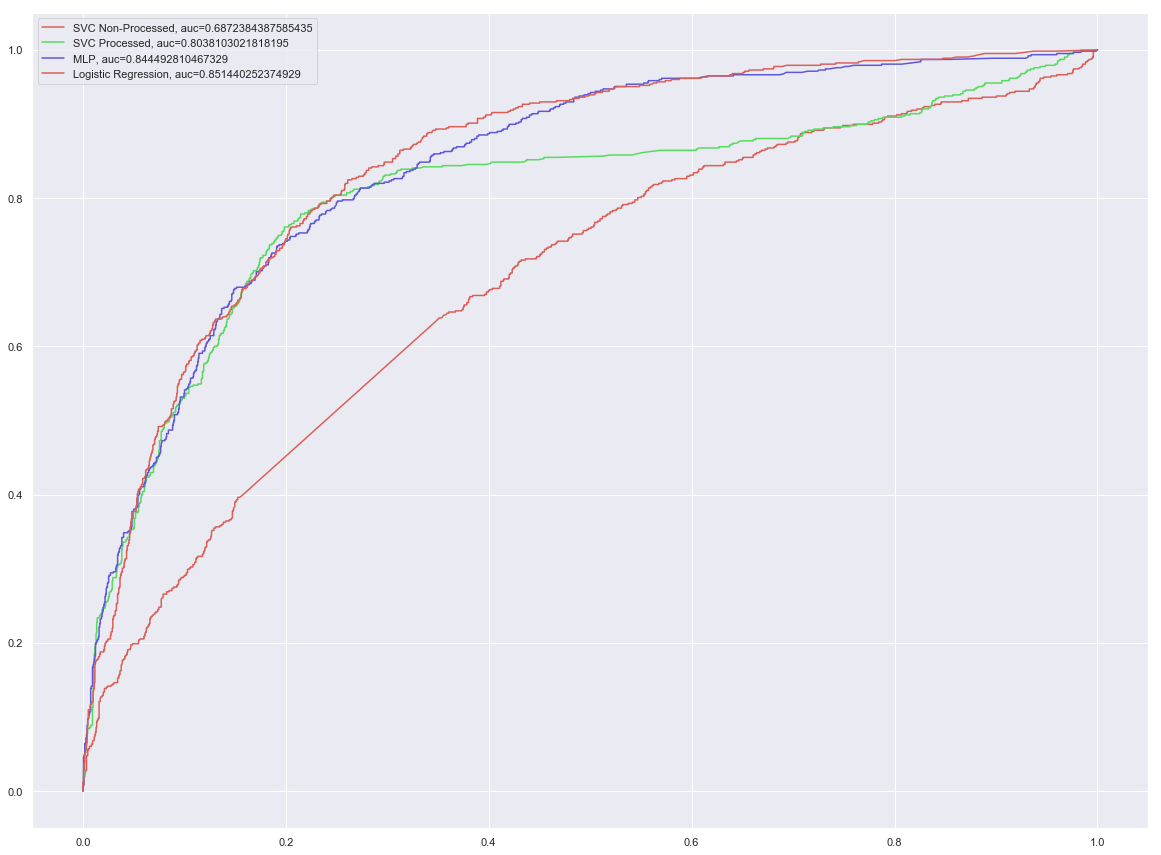

In [70]:
# Plot SVC ROC Curve
plt.figure(0, figsize=(20,15)).clf()
fpr_svc_npp, tpr_svc_npp, thresh_svc_npp = metrics.roc_curve(y_test_npp, y_score_svc_npp)
auc_svc_npp = metrics.roc_auc_score(y_test_npp, y_score_svc_npp)
plt.plot(fpr_svc_npp, tpr_svc_npp, label="SVC Non-Processed, auc=" + str(auc_svc_npp))
fpr_svc, tpr_svc, thresh_svc = metrics.roc_curve(y_test, y_score_svc)
auc_svc = metrics.roc_auc_score(y_test, y_score_svc)
plt.plot(fpr_svc, tpr_svc, label="SVC Processed, auc=" + str(auc_svc))
fpr_mlp, tpr_mlp, thresh_mlp = metrics.roc_curve(y_test, y_score_mlp)
auc_mlp = metrics.roc_auc_score(y_test, y_score_mlp)
plt.plot(fpr_mlp, tpr_mlp, label="MLP, auc=" + str(auc_mlp))
fpr_lr, tpr_lr, thresh_lr = metrics.roc_curve(y_test, y_score_lr)
auc_lr = metrics.roc_auc_score(y_test, y_score_lr)
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression, auc=" + str(auc_lr))
plt.legend(loc=0)
plt.show()